# 1. Unet

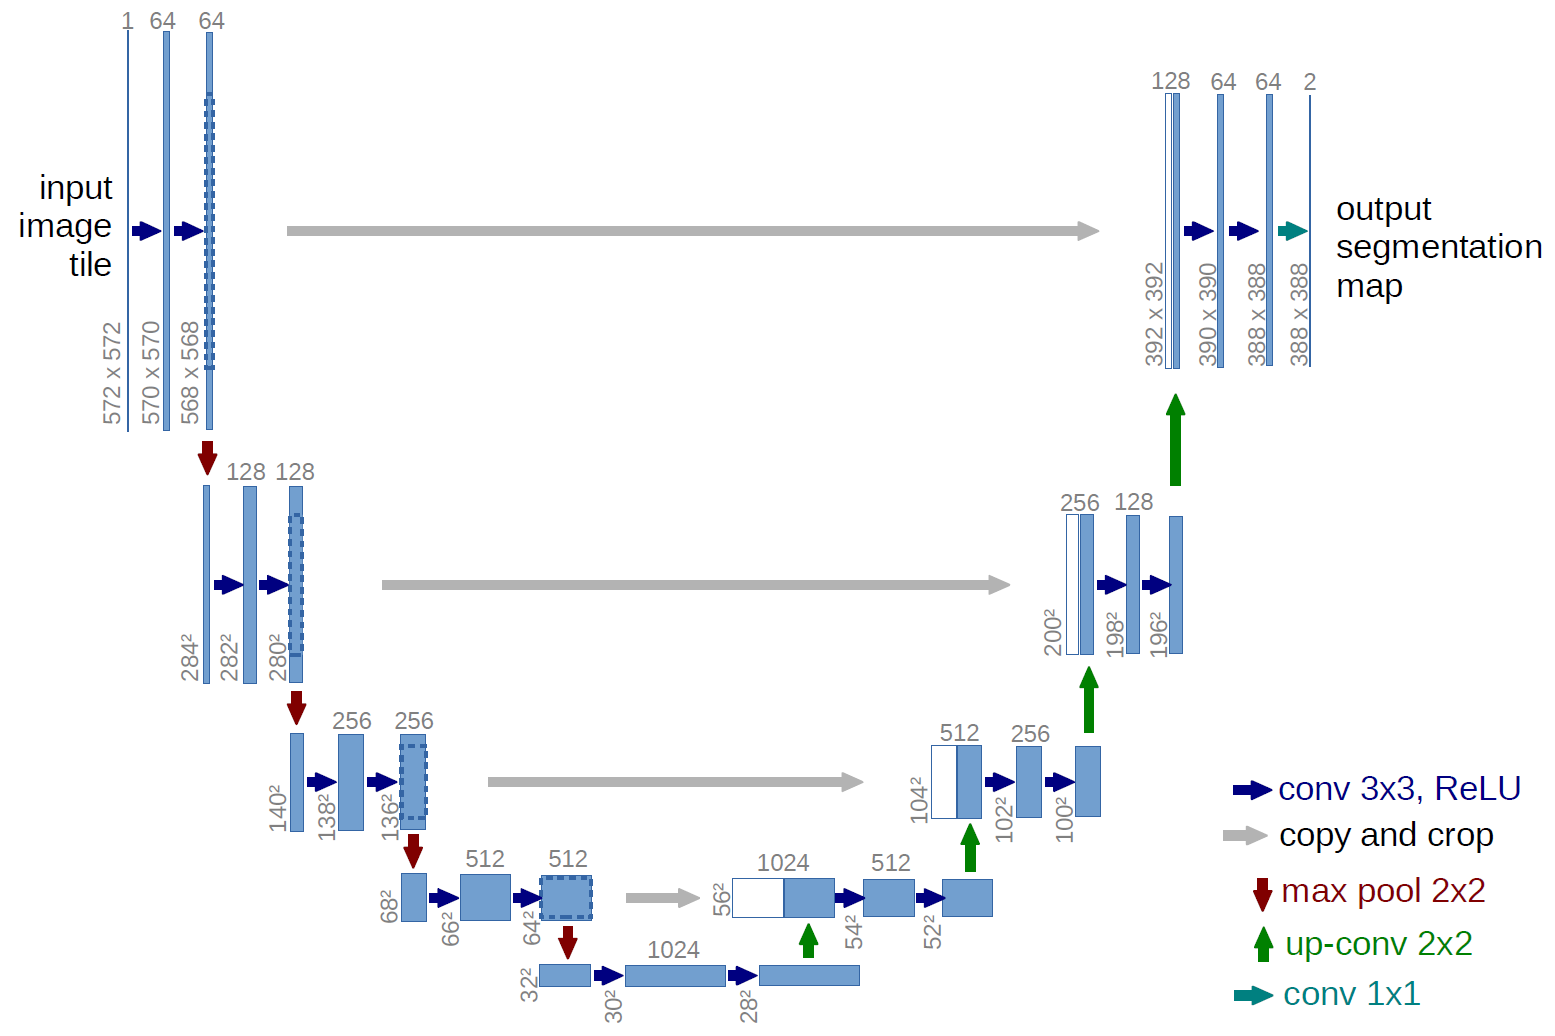

Картинка полностью описывает архитектуру модели. Над каждым слоем написано число каналов на данном этапе, слева от слоя &mdash; размер картинки на текущем шаге. Видно, что размер с каждым шагом уменьшается. Чтобы избежать этого будем добавлять 1 отступ при применении свертки с ядром 3x3. Также добавим нормализацию после каждой свертки.  
  
**Реализация в models/unet.py**

# 2. DeepLabV3Plus

Архитектура модели представлена ниже

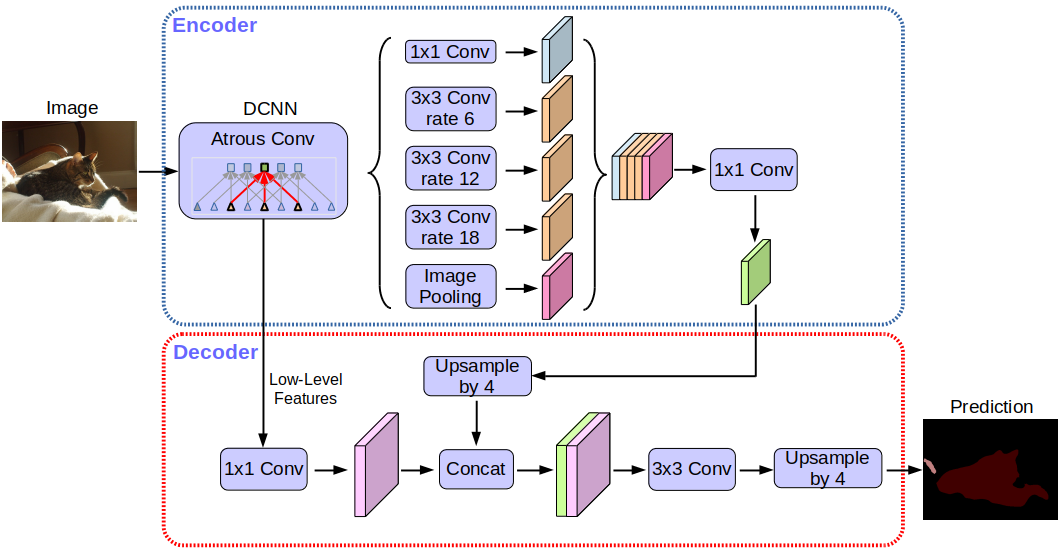

Модель состоит из 2-х частей &mdash; `энкодера` и `декодера`. Энкодер, в свою очередь, состоит из `backbone` (на рисунке обозначен как DCNN) и `Atrous Spatial Pyramid Pooling` (ASPP) &mdash; объединения нескольких раширенных сверток с разными ядрами и расширениями (dilation). Также в ASPP добавлен слой Image Polling, который объединяет в себе GloabalAveragePooling с последующей нормализацией и функцией активации (например, ReLU). После каждой свертки, по аналогии с Unet, добавим нормализацию и ReLU.  
  
**Реализация в models/deeplabv3plus.py**
  
Перейдем к рассмотрению архитектур для backbone.

## 2.1 Resnet-34 (50, 101)

Из семейства resnet в качестве backbone DeepLabV3Plus использует `resnet-34`, `resnet-50` и `resnet-101`.

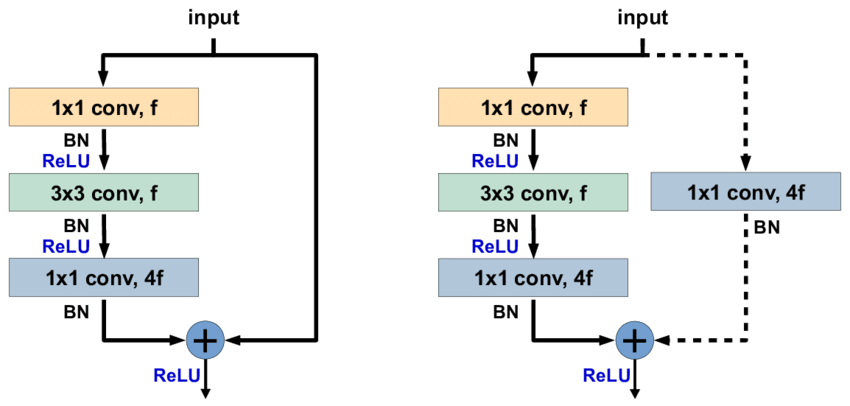

Все модели семейства resnet состоят из блоков (так называемых, `bottleneck`). Разница лишь в количестве этих блоков и немного в их архитектуре. Рассмотрим, например, `bottleneck` для resnet-101. Он состоит из 3-х сверток, после которых применяется нормализация и ReLU. Первая и третья свертка включают ядра 1x1, вторая &mdash; 3x3 и padding=1 для сохранения размера изображения. Также часть блоков имеют `skip-connection`, чтобы избежать затухания градиента.  
  
Кроме того, один из блоков 2-го, 3-го и 4-го слоев при применении свертки с ядром 3x3 использует stride=2, что уменьшает размер изображения в 2 раза.
  
Для каждой из архитектур на картинке ниже показано число блоков и количество каналов в каждом блоке.

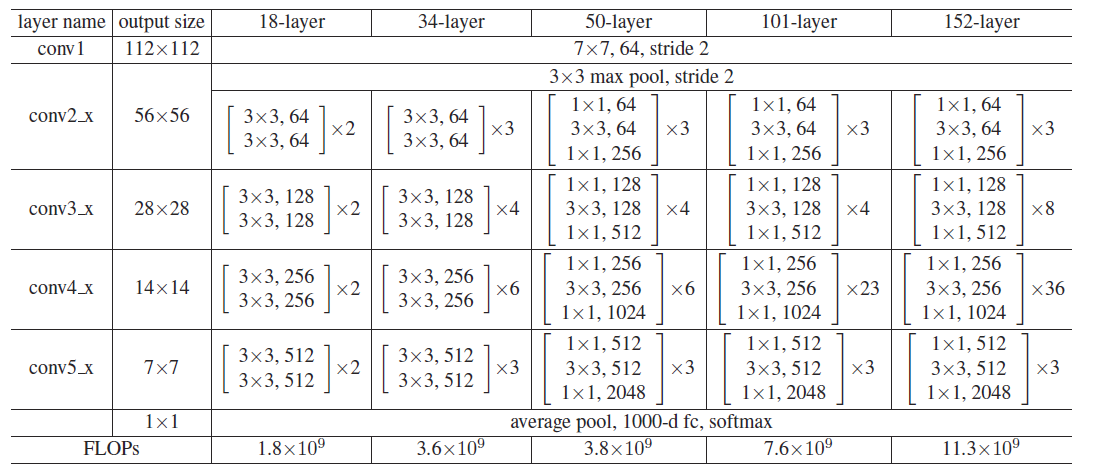

Также в начале используется свертка и maxpooling. Для задачи сегментации последний fc слой убран.  
  
**Реализация в models/resnet.py**

## 2.2 Xception

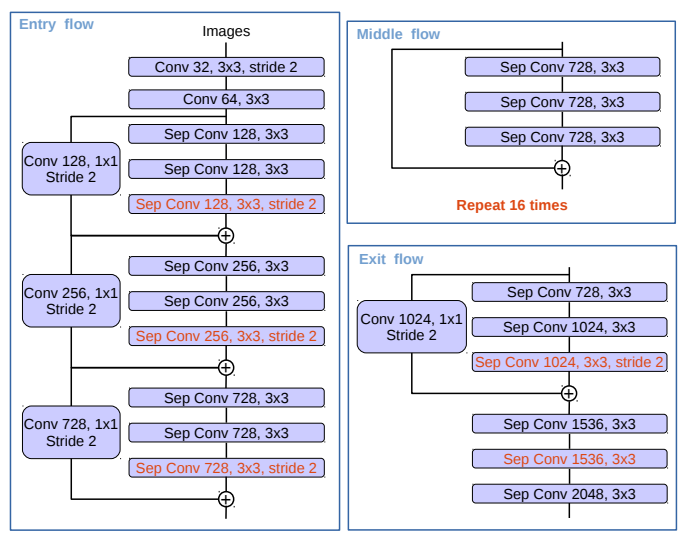

Архитектура модели состоит из 3-х основных блоков &mdash; `entry flow`, `middle flow` и `exit flow`. Красным цветом показаны отличия от оригинальной модели (вместо разделяемой свертки использовался maxpooling, а в middle flow блоки повторялись 8, а не 16 раз).  

Разеделяемая свертка выполняет туже операцию, что и обычная свретка, но состоит из 2-х этапов:
1. `Depthwise Convolution` &mdash; к каждому каналу применяется своя свертка. На выходе мы получаем тензор с таким же числом каналов, что и на входе.
2. `Pointwise Convolution` &mdash; к получившемуся тензору применяется свертка с ядром 1x1 и необходимым на выходе числом каналов.  
  
Разделяемая свертка уменьшает число обучаемых параметров, поэтому мы можем строить более глубокую сети без потери вычислительной эффективности.  
  
**Реализация в models/xception.py**